>*“People think that mathematics is complicated. Mathematics is the simple bit, it’s the stuff we CAN understand. It’s cats that are complicated.”* — John Conway

We've seen how simple yet powerful rules in cellular automata models can lead to extremely complex and highly nonlinear behaviour. 

Analysing this behaviour in a mathematically elegant way isn't straightforward

Today we will see some options and tricks

# Functions used but not output to slides... 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random

In [16]:

def wolfram_ca(rule, num_steps, initial_state):
    """Generate a Wolfram cellular automaton.
    
    INPUTS:
        rule (int): Rule number for the cellular automaton.
        num_steps (int): Number of steps or generations for the automaton.
        initial_state (ndarray): Initial state of the automaton as a 1D array.

    OUTPUTS:
        ndarray: Array representing the cellular automaton with shape (num_steps, num_cells).
    """
    num_cells = len(initial_state)
    automaton = np.zeros((num_steps, num_cells), dtype=np.uint8)
    automaton[0] = initial_state

    # Convert rule to binary representation and ensure it is represented as an 8-bit string
    binary_rule = bin(rule)[2:].zfill(8)

    # Apply rule to generate new states
    for step in range(1, num_steps):
        for i in range(num_cells):
            # Determine the neighborhood states
            left = automaton[step - 1, (i - 1) % num_cells] #here the modulo operator % ensures that the indices wrap around to the opposite end of the automaton if they exceed the range of valid indices. 
            center = automaton[step - 1, i]
            right = automaton[step - 1, (i + 1) % num_cells]
            # Convert neighborhood states to an integer between 0 and 7
            neighborhood = 7 - (left << 2 | center << 1 | right)
            # Apply the rule to determine the new state of the cell
            automaton[step, i] = int(binary_rule[neighborhood])

    return automaton

def plot_ca(automaton, rule):
    """Plot the cellular automaton.
    
    INPUTS: 
        automaton (ndarray): Array representing the cellular automaton.

    OUTPUTS: 
        None
    """
    plt.figure(figsize=(6, 5))
    plt.imshow(automaton, cmap='binary', aspect='auto')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cell')
    plt.ylabel('Step')
    plt.title(f'Rule {rule}')
    plt.show()


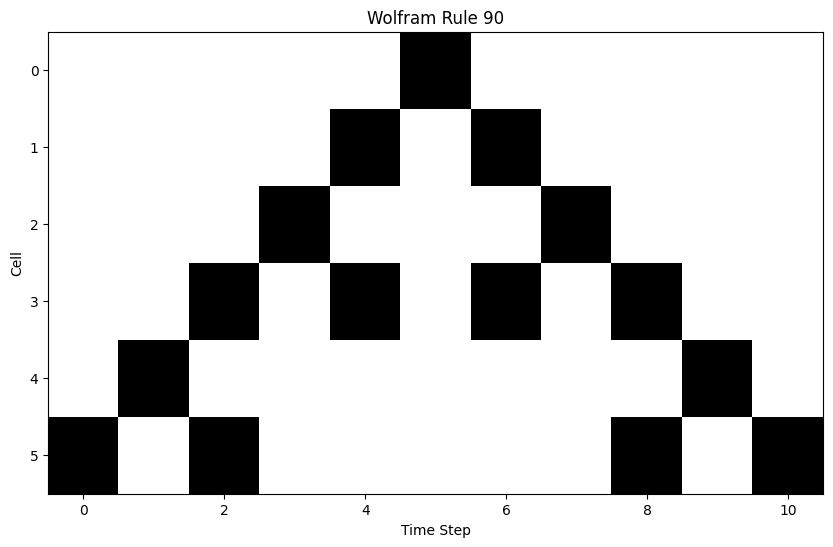

In [17]:
rule_number = 90
steps = 6
L = 11

initial_state = np.zeros(L, dtype=np.uint8) 
initial_state[L//2] = 1

# initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)

# Create and configure the plot
plt.figure(figsize=(10, 6))
plt.imshow(automaton, cmap='Greys', aspect='auto')
plt.title(f'Wolfram Rule {rule_number}')
plt.xlabel('Time Step')
plt.ylabel('Cell')

# Save the plot as an image
plt.savefig(f'rule_{rule_number}_plot.png')

# Display the plot
plt.show()

# Rule space

CA models are discrete in time and space, and typically the states of the cells are also discrete

This means that the number of all possible neighbourhoods and responses to those neighbourhoods is finite and therefore countable... we can actually list out all possible state-transition functions with an exhaustive search if we want to 
<!-- and are as crazy as Wolfram -->

Together, these form the *rule-space*. 

Let 
- $D$ be the dimension of the space
- $r$ be the radius of the neighbourhood

If using a Moore template the size of the neighbourhood will be $2r+1$ neighbours in each dimension and hence the total number of neighbours $n=(2r+1)^D$. 

- $k$ be the number of possible states

Each of the cells in a neighbourhood can be in one of $k$ states. Hence the neighbourhood could be one of $c = k^n$

Now each of those neighbourhoods needs a state-transition: $k^c=k^{k^n}=k^{k^{(2r+1)^D}}$

This obviously gets very large, very quickly

We've seen how Wolfram's elementary CA have $2^{2^3}$ possible sets of 'physics', which was sort of manageable. Game of Life used a totalistic rule to reduce the size of the rule-space from $2^{2^9}$ to a few simple entries in a lookup table

# Phase-space
The *phase-space*, on the other hand, contains all of the possible configurations - the parallel universes that can emerge from these rules 

If the space is finite then we can list these too

Let
- $L$ be the length of space in each dimension

Then for a regular domain the total number of cells (volume) is $L^D$ and each cell can be in one of $k$ states hence we have $k^{L^D}$ possible configurations

## Classifying behaviour

The emerging configurations can be classified (after some transient from a random initialisation)

Wolfram classified each of the 256 CAs into four classes based on how they evolve from anything to their eventual patterns

They are numbered in order of increasing complexity

Whilst it's not exactly a useless classification, it is somewhat ill-defined, qualitative and not necessarily exhaustive or mutually exclusive. It also generalises poorly to other rule-spaces.

##### Examples of Class 1
Class 1: development of patterns tends towards vacuum - a stable uniform state 

e.g. rules 0 and 32.

<center>
<img src="Class1.png" width="300">
</center>

https://www.wolframscience.com/nks/p231--four-classes-of-behavior/

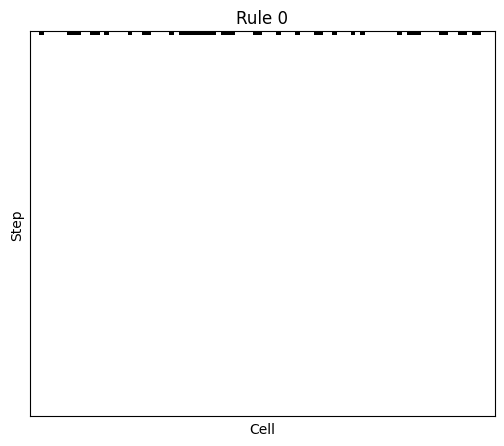

In [18]:
#e.g. rules 0, 32, 160 ...

rule_number = 0
steps = 100
L = 100 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Examples of Class 2
- Class 2: patterns tends toward simple stationary -- simple structures that either remain the same forever or repeat every few steps.

e.g. rules 4 and 108

<center>
<img src="Class2.png" width="300">
</center>

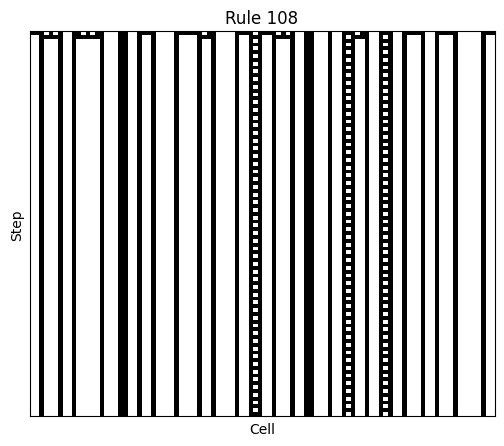

In [19]:
#e.g. rules 4, 108, 218...

rule_number = 108
steps = 100
L = 100 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Examples of Class 3
- Class 3: *appear* to generate randomness via intricate nested repeats and periodic patterns 

e.g. rule 30. 

The key word here is 'appear' - remember this is a deterministic rule so it's not actually random and they are more like chaotic systems in this way. Real randomness does challenge determinism more seriously but it is nice, and perhaps surprising, to get apparent randomness from such simple deterministic computation 

<center>
<img src="Class3.png" width="300">
</center>

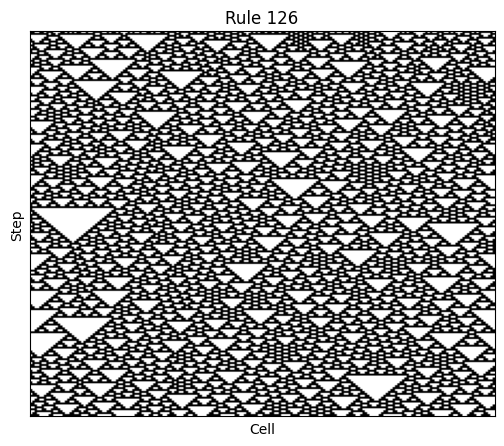

In [7]:
#e.g. rules 22, 30, 126, 150, 182...

rule_number = 126
steps = 200
L = 200 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Examples of Class 4
- Class 4: sits at the border of chaos and stability, order and randomness. 

e.g. rule 110, Game of Life  

Creates complicated local and persistent structures that appear as disturbances to the regular background. It allows discussion of objects (spaceships) moving and proposals of information being passed with simple computations being carried out when objects collide. Rule 110 has been proved to be Turing-complete, or 'Universal', i.e. able to simulate any computer program and is arguably the simplest known Turing complete system.

<center>
<img src="Class4.png" width="300">
</center>

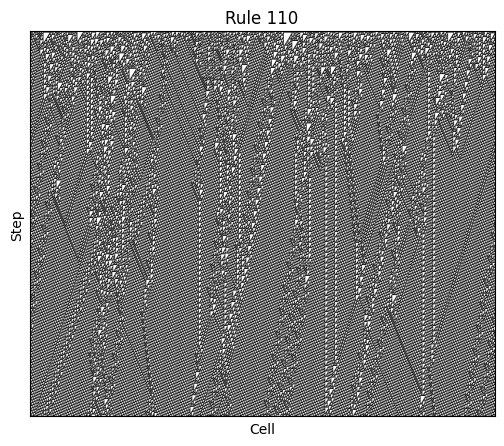

In [20]:
#e.g. rule 110...

rule_number = 110
steps = 500
L = 1000 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

### Cellular automata as computers

GoL and Wolfram's Rule 110 support universal computation (moving particles in space and time transfer information from different spatial locations, stored in more regular structures and processed via collisions. Fine in principle, near-impossible in reality because it is slow  and hard)

<!-- Some Class 3 CA may also support -->

This behaviour mimics a logic gate, that is, an interaction which produces a 1 or 0, which is a critical aspect of the way our computers process information. Similarly, NAND gates can also be generated, which both computers and neurons use to trigger a signal only when a certain threshold is achieved

If you don't view CA as computers themselves then perhaps you see them as logical universes that computers can be embedded in...?

##### An aside: Turing-complete systems 
Computation is simply information processing (input, stored, transfered, combined or processed, output) and an automata is memory and processor at the same time

Universal computation (aka Turing machines) is a computer that can be programmed to compute any computable function. Only a small set of logical operation is needed to support universal computation 

They are 'Turing complete', in that eventually all possible states can be realised using certain rules and, therefore, any problem that is computable can be solved (assuming no limitations on time or space/memory)

Requirements for Turing-completeness:
- Conditional Branching: ability to make decisions based on conditions (e.g., "if-then-else" statements)
- Repetition/Loops: ability to perform operations repeatedly (e.g., "for" or "while" loops)
- Memory Management: ability to read from and write to a memory store, such as variables or an equivalent data structure.

# Understanding the dynamics

## State-transition diagrams

We can (try to) visualise the dynamics with a *state-transition diagram*, which unsurprisingly consists of states and transitions between states (and possibly other things like events but not in our context)

By enumerating all the phase-space configurations and transitions as the configurations evolve, we obtain a list of connections between the discrete states, which forms a network

The dynamics of the system can then be analysed e.g. the number of basins of attraction, their sizes, and the properties of the attractors can be explored, topology of the transition network etc...

<!-- If the long-term behaviour of the CA 'settles' to a steady state then we could list the possible configurations and present them along with a histogram showing their likely appearance. We could construct this histogram using many Monte Carlo simulations. -->

Note: The state-transition functions refer to how the *local* configuration/state updates. A state-transition diagram refers to how the *global* configuration/state updates.

### Wolfram: State-transition diagrams
$L=3$
<center>
<img src="Rule11,110_PhaseSpaceTransition.png" width="500">
</center>

We can do this if the size of the global configuration isn't too large (where by 'too large', I mean not very large at all!)

See here: https://demonstrations.wolfram.com/CellularAutomatonStateTransitionDiagrams/

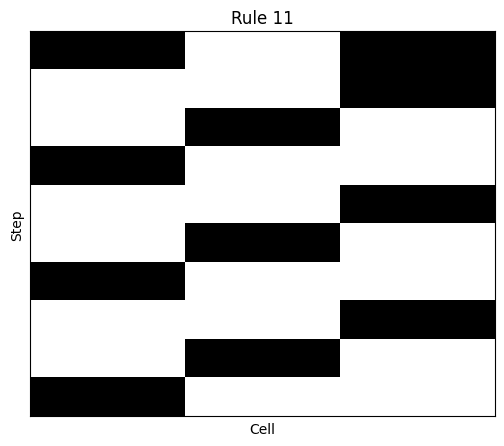

In [25]:
rule_number = 11
steps = 10
L = 3
# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state = np.ones(L, dtype=np.uint8) 
# initial_state[L//2] = 1 #central cell assignment

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

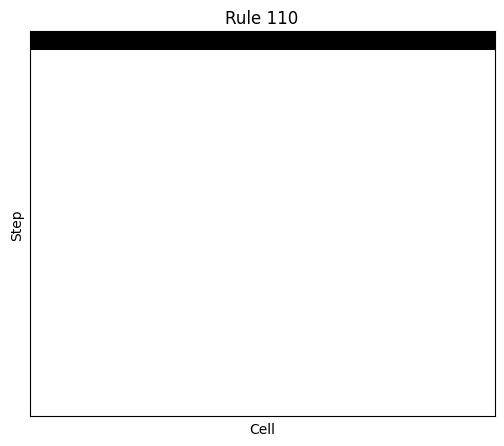

In [10]:
rule_number = 110
steps = 20
L = 3
# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

As the volume of cells gets bigger these diagrams become increasingly complex and direct enumeration becomes impractical

$L=12$

<center>
<img src="Rule11,110_PhaseSpaceTransition_Big.png" width="500">
</center>

See here 
https://demonstrations.wolfram.com/CellularAutomatonStateTransitionDiagrams/

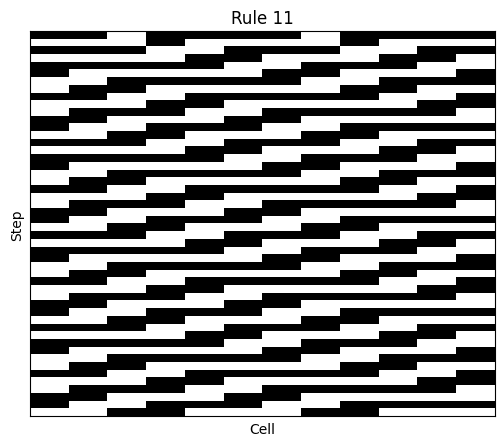

In [11]:
rule_number = 11
steps = 50
L = 12
# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plt1 = plot_ca(automaton, rule_number)

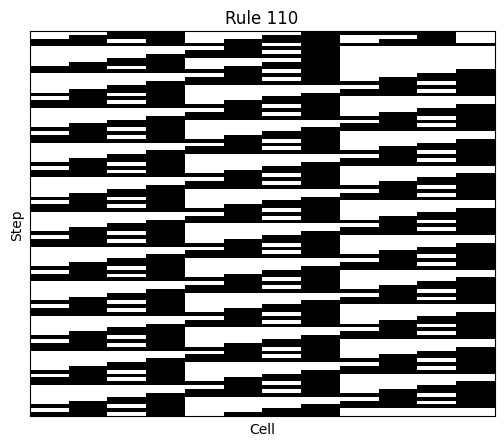

In [26]:
rule_number = 110
steps = 100
L = 12
# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

## Reversability
State-transition diagrams map a configuration, $X$, to its *successor*, $Y$

$X$ is the *predecessor* of $Y$

A configuration may have zero, one, or more predecessors, but will always have exactly one successor, i.e. known future, potentially unknown past

If every configuration has a *unique predecessor* then the CA is **reversible** 

Hence reversible CA have bijective state-transition functions

Recall:
<center>
<img src="Bijections.png" width="500">
</center>

### Wolfram

Trivial rules are typically reversible. There are not many of these:
- cells remain unchanged, Rule 204
- cells flip state, Rule 51
- cells copy the state of a neighbouring cell, e.g. Rule 170
- cell's next state is the XOR (exclusive OR) of its two neighbors, e.g. Rule 90, Rule 150

There are no 'nontrivial' reversible elementary cellular automata

Rule 254 is an example that is *not* reversible
 
<!-- There are many examples of systems in nature that seem to organise themselves a little like this conflicting with the known reversibility of underlying laws of physics-->


### Game of Life
Not reversible

Consider for instance, that:
- it has many patterns that die out completely (many predecessors)
- Garden of Eden patterns have been discovered
- the rules of the Game of Life involve a loss of information:

Computationally universal CA, such as rule 110 and Game of Life, are often not reversible

## Garden of Eden states

An *'orphan'* is a pattern with no predecessor

A *Garden of Eden* is a configuration that contains an orphan (perhaps the initial configuration but they cannot arise in any other way)

- 1-dimension: they can be found by an efficient algorithm
- higher dimensions: it's an undecidable problem 

For reversible automata, no Garden of Eden states exist, while non-reversible automata might have such states.

### Wolfram

Garden of Eden states are the 'leaves' in the state-transition diagrams

e.g. Rule 110 is irreversible, with many Garden of Eden states. Rule 240 is logically reversible
<center>
<img src="ECA_IrreversibleReversible.png" width="500">
</center>

### Game of Life

An example of a Garden of Eden (from R. Banks in 1971):
<center>
<img src="Garden_of_Eden_GoL.png" width="500">
</center>

Reversible CAs thus bear some similarity to Newtonian mechanics, which is microscopically reversible, albeit with discrete time-steps, rather than continuous behaviour governed by differential equations. 

Life on the other hand is frequently irreversible on account of systems being dissipative (arrow of time is essential for life)

In general it is undecidable (not just intractable) whether a CA is reversible i.e. no single algorithm that can take any configuration as input is guaranteed to terminate and find the correct answer of whether it is a Garden of Eden state.
<!-- i.e. truly undecidable in the formal sense of computability theory (a theoretical impossibility, not dependent on practical limitations like time or computational power) -->
<!-- This is akin to the Halting Problem in Turing machines. The Halting Problem is undecidable because there is no general algorithm that can determine whether any arbitrary program will halt or run forever. Similarly, there is no general algorithm that can determine if any arbitrary configuration in the Game of Life is a Garden of Eden state. -->
<!-- The undecidability of this problem has been established through mathematical proofs based on the inherent limitations of computation -->

# Mean field approximation 

When there are too many moving parts it's important to think critically about the distinction between “wholes” and “parts”
 
Reformulating the dynamics in terms of the “average state” can reduce the dimensionality 

We then aim to understand how a cell interacts with this average state and how the average state itself changes over time, providing a macroscopic view of the behaviour

This is a *mean-field approximation*

It disregards any spatial relationships and treats every component as uniformly represented by a global average with the dynamics occurring probabilistically. 


<center>
<img src="GoL_MeanField.png" width="700">
</center>

The system’s state at iteration $n$, is approximated just by one variable: the density of 1s, $\rho(n)$

We now aim to describe the dynamics with a difference equation that can then be analysed with, for example, a cobweb diagram as per MATH3021 (see Sayama for details if you're interested)


It performs well in systems with complete or random connections among their components

Used for all sorts of large-scale dynamical systems. 

Not a bad first step but you must take the results with a grain of salt when it comes to applying it to complex systems like CA...

Because it's ineffective when dealing with local or non-homogenous interactions, or systems that exhibit non-homogeneous patterns of states (i.e. everything we characteristic of complex systems!) 

## Is the universe a simulation?

Natural systems can be mimicked in the artificial programming universes of cellular automata, which means it’s very likely they hold some secrets to the nature of life itself

(But we must be careful *'similar pattern does not imply similar process'* - Prof. Sally Thompson)

Could the universe itself, at its deepest level, operate on the basis of similarly discrete digital rules and cascading green code?


<center>
<img src="MidJ_LivingInASimulation.png" width="400">
</center>
<!-- Such a scenario was speculated in the 1960s by Ed Fredkin, and later dubbed “It from Bit” by the accomplished physicist John Wheeler.  -->

The 'simulation hypothesis' has remained the focus of much debate surrounding the significance of cellular automata (it's a rabbit hole if you have time you wish to kill)

We probably haven't even scratched the surface of what CA can do

# Connection to other units

**MATH3002**
- By enumerating the possible configurations and state transitions we can represent this information as a graph, where the nodes represent a particular local configuration 


**MATH3021**
- CAs are dynamical systems. Consider for example the Classes of elementary CAs -- we see fixed points, periodic oscillations

Is the Schelling model a CA?
Are fractals CA?
Reaction-diffusion

zero-player games” because they remove the uncertainty of player decisions, since the moves are determined beforehand by set preferences among the different players, or classes of agents

Is GoL a self-organising critical system?

## Analysis
Langton defined a simple number that can be used to help predict whether a given CA will fall in the ordered realm, in the chaotic realm, or near the boundary, on the "edge of chaos." The number can be computed from the rules of the CA. It is simply the fraction of rules in which the new state of the cell is living. (The rule in which a cell and all its neigbors are dead is not counted, since Langton assumed that the new state in this rule is always death.) He called this parameter "lambda."

The lambda parameter of a CA is a number between 0 and 1. If lambda is 0, then all cells die immediately, since every rule leads to death. If lambda is 1, then any cell that has at least one living neighbor will stay alive in the next generation and, in fact, forever. More generally, values of lambda close to zero give CA's in the ordered realm. Values close to 1 give CA's in the chaotic realm. The edge of chaos is somewhere in between.

Unfortunately, we can't simply say that there is a value of lambda that represents the edge of chaos. It's more complicated than that. Here is what Langton found: Suppose you start with a CA with lambda equal to zero, where all rules lead to death. Now, suppose you randomly modify rules one-by-one so that the new rules lead to life instead of death. This causes the lambda value to increase. As you do this, you get a sequence of CA's with lambda values increasing from zero to one. At the beginning, the CA's are highly ordered; at the end they are chaotic. Somewhere in between, at some critical value of lambda, there will be a transition from order to chaos. It is near this transition that the most interesting CA's tend to be found, the ones that have the most complex behavior.

As I've said, though, the critical value for lambda is not a universal constant; it depends on the "path" chosen through the space of CA's. 